# EP1 - PMR3508 - Aprendizado de Máquina e Reconhecimento de Padrões

Testando o classificador kNN na base de dados 'Adult'.

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

Lemos os dados de treino e teste

In [2]:
train_path = './archive/adult_train.csv'
test_path = './archive/adult_test.csv'

df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

In [3]:
df_train.head()

,age,workclass,Unnamed: 2,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Identificando variáveis numéricas e categóricas

Breve análise sobre as variáveis presentes no dataset

In [4]:
df_train.describe()

,age,Unnamed: 2,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
df_train.describe(include=['object', 'category'])

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,Income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


Verificamos se há valores nulos ou faltantes na base de treino

In [ ]:
df_train.isnull().sum() 

## Entendendo as colunas

### Descrição das Variáveis Númericas
---
**fnlwgt (final weight)**  
Peso final de amostragem calculado pelo Census Bureau. Indica o número de pessoas na população total que a observação representa. Utilizado para corrigir vieses de amostragem e permitir inferências sobre toda a população.

**education.num**  
Representação numérica do nível de educação. Escala exemplar: 1 (Pré-escola), 9 (Ensino médio), 13 (Bacharelado), 16 (Doutorado).

**capital.gain**  
Rendimentos positivos de investimentos financeiros, como venda de ações, propriedades ou outros ativos.

**capital.loss**  
Perdas financeiras decorrentes de investimentos, como venda de ativos abaixo do valor de aquisição.

**hours.per.week**  
Número total de horas trabalhadas por semana na ocupação principal. Valores típicos: 0-99 (40 representa trabalho em tempo integral).

---

## Análise das Variáveis Categóricas

Vamos tentar entender melhor sobre a distribuição dos dados, a quantidade de valores distintos, a presença ou não de outliers. A partir deles, poderemos inferir abordagens para a preparação de dados (data prep).

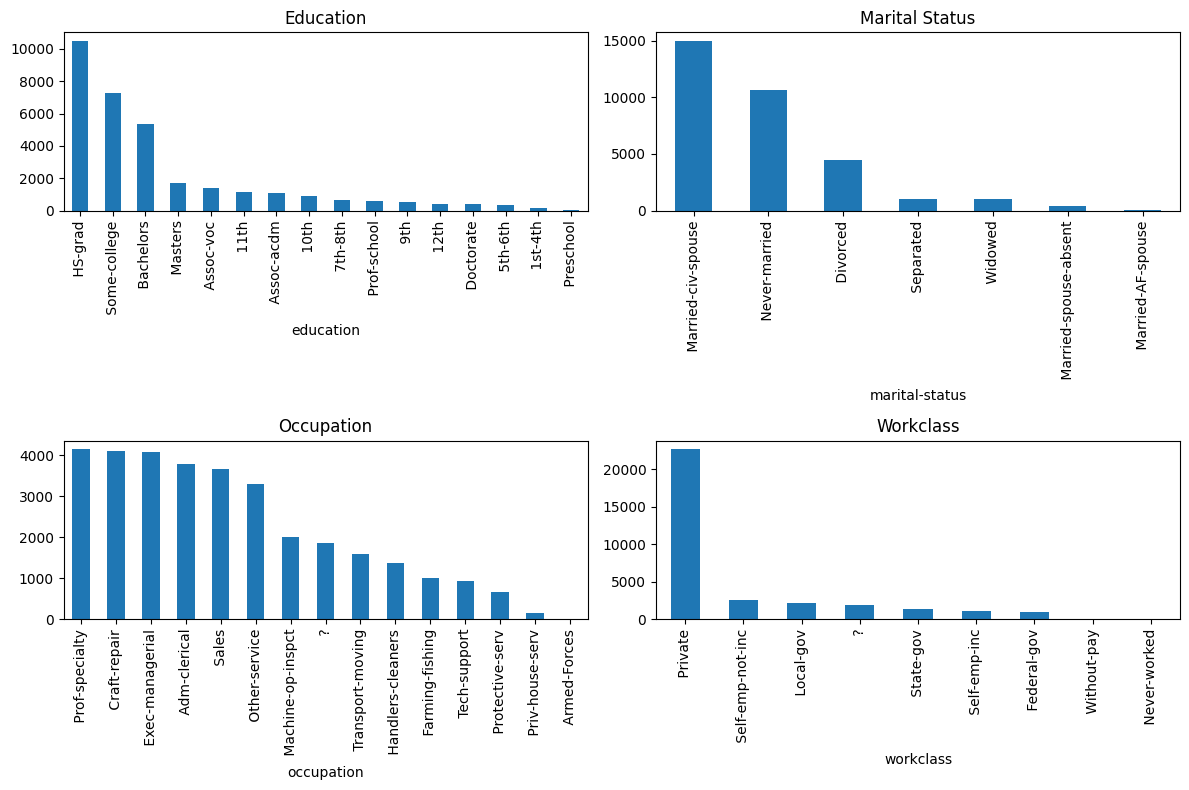

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plotar gráficos de barra com tais colunas:
df_train["workclass"].value_counts().plot(kind="bar", ax=axes[1,1], title="Workclass")
df_train["education"].value_counts().plot(kind="bar", ax=axes[0,0], title="Education")
df_train["marital-status"].value_counts().plot(kind="bar", ax=axes[0,1], title="Marital Status")
df_train["occupation"].value_counts().plot(kind="bar", ax=axes[1,0], title="Occupation")

plt.tight_layout()
plt.show()

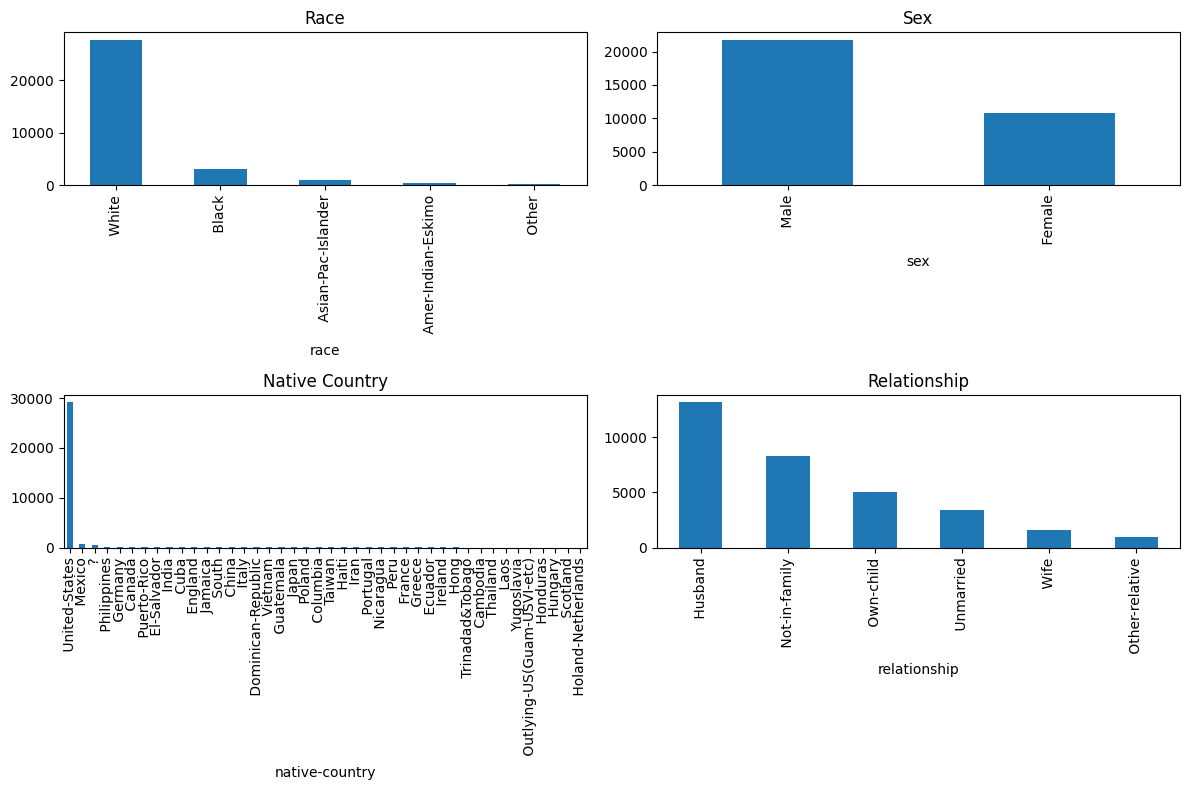

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

df_train["relationship"].value_counts().plot(kind="bar", ax=axes[1,1], title="Relationship")
df_train["race"].value_counts().plot(kind="bar", ax=axes[0,0], title="Race")
df_train["sex"].value_counts().plot(kind="bar", ax=axes[0,1], title="Sex")
df_train["native-country"].value_counts().plot(kind="bar", ax=axes[1,0], title="Native Country")

plt.tight_layout()
plt.show()

## Análise das Variáveis Numéricas

Nessa seção, faremos o mesmo da anterior, mas para as variáveis numéricas. Por isso, usaremos histogramas.

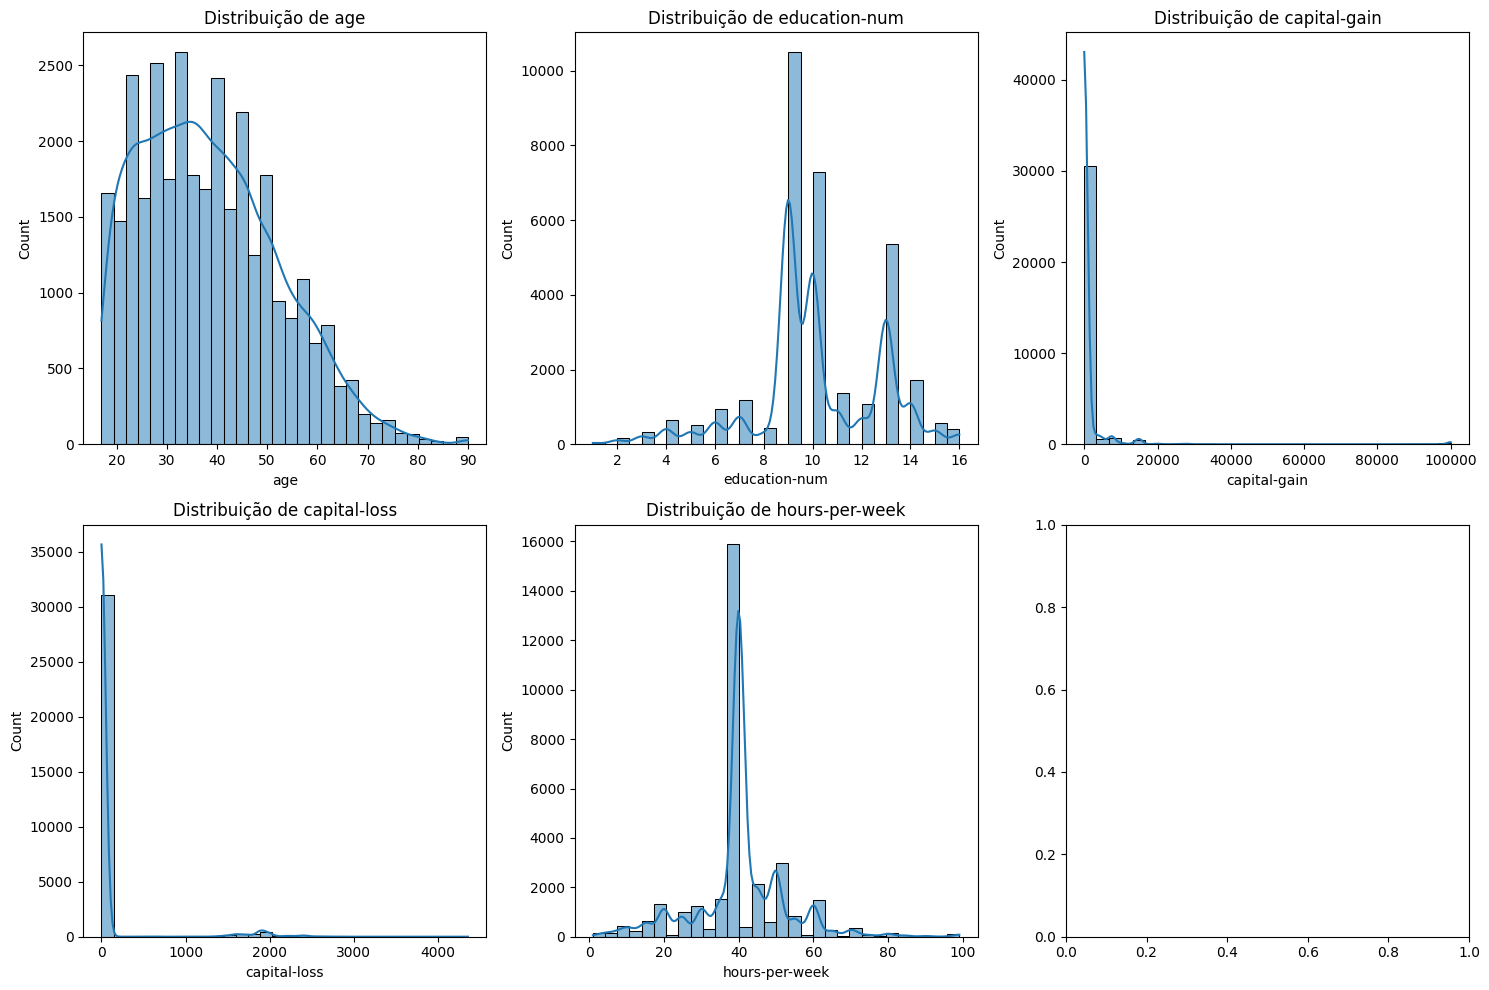

In [ ]:
numeric_vars = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

# Criar grid de histogramas
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, var in enumerate(numeric_vars):
    sns.histplot(df_train[var].dropna(), kde=True, ax=axes[i], bins=30)
    axes[i].set_title(f'Distribuição de {var}')
    axes[i].set_xlabel(var)

plt.tight_layout()
plt.show()

### Interpretação dos Gráficos

Destacamos a presença de variáveis com distribuições muito assimétricas, como `native.country`, `capital-gain` e `capital-loss`. Além disso, identificamos a presença de dados faltantes com valor `?`, que passaram ilesos pela verificação anterior.

# Data Prep

In [10]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

### Removendo os dados faltantes: '?'

In [11]:
print("=== ANÁLISE DETALHADA DOS VALORES '?' ===")

# Criar máscara para valores que são '?' (com ou sem espaços)
def find_question_marks(df):
    question_mask = df.apply(lambda col: col.astype(str).str.strip() == '?')
    return question_mask

dfs = {'TREINO:' : df_train, 'TESTE:' : df_test}
linhas_para_remover = []

for s, df_ in dfs.items():

    question_mask = find_question_marks(df_)

    # Contar por coluna
    print("\n",s)
    print("Valores '?' (com espaços) por coluna:")
    for coluna in df_.columns:
        q_count = question_mask[coluna].sum()
        if q_count > 0:
            percentual = (q_count / len(df_train)) * 100
            print(f"  {coluna}: {q_count} valores ({percentual:.2f}%)")

    # Total de linhas com pelo menos um '?'
    linhas_com_interrogacao = question_mask.any(axis=1)
    linhas_para_remover.append(linhas_com_interrogacao)
    total_linhas_com_problema = linhas_com_interrogacao.sum()

    print(f"\nTotal de linhas com '?': {total_linhas_com_problema}")
    print(f"Percentual: {(total_linhas_com_problema/len(df_train))*100:.2f}%")

=== ANÁLISE DETALHADA DOS VALORES '?' ===

 TREINO:
Valores '?' (com espaços) por coluna:
  workclass: 1836 valores (5.64%)
  occupation: 1843 valores (5.66%)
  native-country: 583 valores (1.79%)

Total de linhas com '?': 2399
Percentual: 7.37%

 TESTE:
Valores '?' (com espaços) por coluna:
  workclass: 963 valores (2.96%)
  occupation: 966 valores (2.97%)
  native-country: 274 valores (0.84%)

Total de linhas com '?': 1221
Percentual: 3.75%


#### Aqui removemos, de fato

In [12]:
# Remover linhas que contêm '?' em qualquer coluna (considerando espaços)
df_train_clean = df_train[~linhas_para_remover[0]].copy()
df_test_clean = df_test[~linhas_para_remover[1]].copy()

# Reset index para manter organização
df_train_clean = df_train_clean.reset_index(drop=True)
df_test_clean = df_test_clean.reset_index(drop=True)

### Encoding da variável _target_

Codificaremos a nossa variável alvo Y = `income` como 

$ Y = 1, \text{se} > 50K \\ Y = 0, \text{se} <= 50K $ 

In [13]:
df_train_clean['Income'] = df_train_clean['Income'].str.strip().str.rstrip('.')
df_test_clean['Income'] = df_test_clean['Income'].str.strip().str.rstrip('.')

income_mapping = {'<=50K': 0, '>50K': 1}

df_train_clean.loc[:, 'income-encoded'] = df_train_clean['Income'].map(income_mapping)
df_train_clean = df_train_clean.drop('Income', axis=1)

df_test_clean.loc[:, 'income-encoded'] = df_test_clean['Income'].map(income_mapping)
df_test_clean = df_test_clean.drop('Income', axis=1)

Aqui, verificamos a distribuição dos valores do _target_. Os resultados são um pouco desbalanceados

In [14]:
target_counts = df_train_clean['income-encoded'].value_counts()
target_percentages = df_train_clean['income-encoded'].value_counts(normalize=True) * 100

print("=== DISTRIBUIÇÃO DO TARGET NO TREINO ===")
print(f"Total de amostras: {len(df_train_clean['income-encoded'])}")
print(f"Classe 0 (<=50K): {target_counts[0]} amostras ({target_percentages[0]:.2f}%)")
print(f"Classe 1 (>50K):  {target_counts[1]} amostras ({target_percentages[1]:.2f}%)")

=== DISTRIBUIÇÃO DO TARGET NO TREINO ===
Total de amostras: 30162
Classe 0 (<=50K): 22654 amostras (75.11%)
Classe 1 (>50K):  7508 amostras (24.89%)


### Tratando e Transformando algumas _features_

In [15]:
def clean_native_country(country):
    if country == 'United-States':
        return country
    else:
        return 'Other'

df_train_clean['native-country-grouped'] = df_train_clean['native-country'].str.strip().str.rstrip('.').apply(clean_native_country)
df_test_clean['native-country-grouped'] = df_test_clean['native-country'].str.strip().str.rstrip('.').apply(clean_native_country)

df_train_clean = df_train_clean.drop('native-country', axis=1)
df_test_clean = df_test_clean.drop('native-country', axis=1)

df_train_clean.head()

,age,workclass,Unnamed: 2,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,income-encoded,native-country-grouped
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,0,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,0,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,0,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,0,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,0,Other


### Encoding +

In [16]:
categorical_cols = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country-grouped']

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_train_clean[f'{col}-encoded'] = le.fit_transform(df_train_clean[col])
    
    try:
        df_test_clean[f'{col}-encoded'] = le.transform(df_test_clean[col])
    except ValueError:
        # Se aparecer categoria nova no teste, atribuir -1
        mask = df_test_clean[col].isin(le.classes_)
        df_test_clean[f'{col}-encoded'] = np.where(mask, le.transform(df_test_clean.loc[mask, col]), -1)
    
    label_encoders[col] = le
    print(f"{col}: {dict(zip(le.classes_, range(len(le.classes_))))}")

for col in categorical_cols:
    df_train_clean = df_train_clean.drop(col, axis=1)
    df_test_clean = df_test_clean.drop(col, axis=1)

workclass: {' Federal-gov': 0, ' Local-gov': 1, ' Private': 2, ' Self-emp-inc': 3, ' Self-emp-not-inc': 4, ' State-gov': 5, ' Without-pay': 6}
marital-status: {' Divorced': 0, ' Married-AF-spouse': 1, ' Married-civ-spouse': 2, ' Married-spouse-absent': 3, ' Never-married': 4, ' Separated': 5, ' Widowed': 6}
occupation: {' Adm-clerical': 0, ' Armed-Forces': 1, ' Craft-repair': 2, ' Exec-managerial': 3, ' Farming-fishing': 4, ' Handlers-cleaners': 5, ' Machine-op-inspct': 6, ' Other-service': 7, ' Priv-house-serv': 8, ' Prof-specialty': 9, ' Protective-serv': 10, ' Sales': 11, ' Tech-support': 12, ' Transport-moving': 13}
relationship: {' Husband': 0, ' Not-in-family': 1, ' Other-relative': 2, ' Own-child': 3, ' Unmarried': 4, ' Wife': 5}
race: {' Amer-Indian-Eskimo': 0, ' Asian-Pac-Islander': 1, ' Black': 2, ' Other': 3, ' White': 4}
sex: {' Female': 0, ' Male': 1}
native-country-grouped: {'Other': 0, 'United-States': 1}


### Feature Selection

In [17]:
df_train_filtred = df_train_clean.drop(['education', 'Unnamed: 2'], axis=1)
df_test_filtred = df_test_clean.drop(['education', 'Unnamed: 2'], axis=1)

df_train_filtred.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,income-encoded,workclass-encoded,marital-status-encoded,occupation-encoded,relationship-encoded,race-encoded,sex-encoded,native-country-grouped-encoded
0,39,13,2174,0,40,0,5,4,0,1,4,1,1
1,50,13,0,0,13,0,4,2,3,0,4,1,1
2,38,9,0,0,40,0,2,0,5,1,4,1,1
3,53,7,0,0,40,0,2,2,5,0,2,1,1
4,28,13,0,0,40,0,2,2,9,5,2,0,0


=== CORRELAÇÃO COM O TARGET ===
income-encoded                    1.000000
education-num                     0.335286
relationship-encoded              0.251003
age                               0.241998
hours-per-week                    0.229480
capital-gain                      0.221196
sex-encoded                       0.216699
marital-status-encoded            0.193518
capital-loss                      0.150053
race-encoded                      0.071658
occupation-encoded                0.051577
native-country-grouped-encoded    0.040204
workclass-encoded                 0.018044
Name: income-encoded, dtype: float64


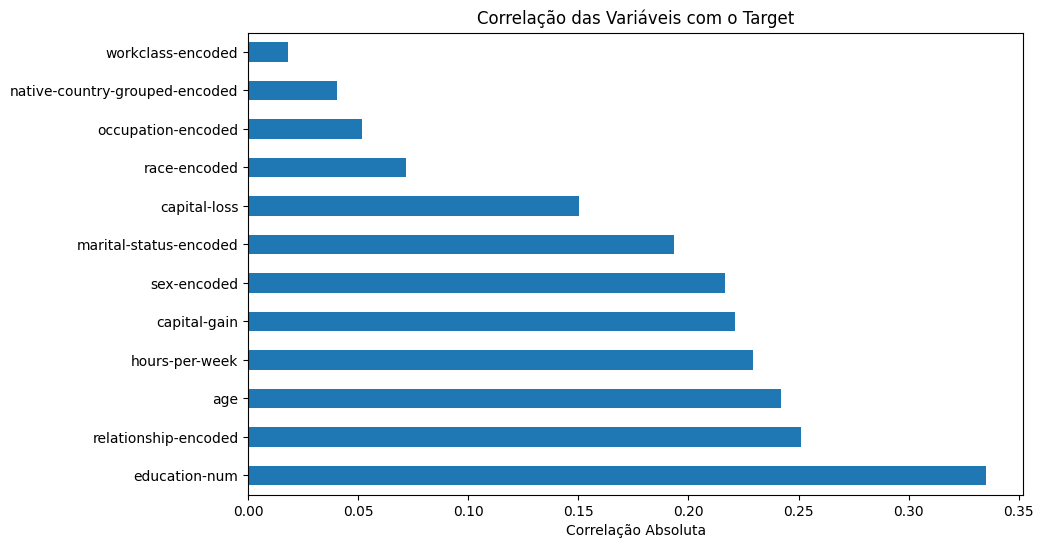

Variáveis selecionadas por correlação (threshold 0.1): ['education-num', 'relationship-encoded', 'age', 'hours-per-week', 'capital-gain', 'sex-encoded', 'marital-status-encoded', 'capital-loss']


In [18]:
# Calcular correlação de todas as variáveis com o target
correlation_with_target = df_train_filtred.corr()['income-encoded'].abs().sort_values(ascending=False)

print("=== CORRELAÇÃO COM O TARGET ===")
print(correlation_with_target)

# Visualizar
plt.figure(figsize=(10, 6))
correlation_with_target.drop('income-encoded').plot(kind='barh')
plt.title('Correlação das Variáveis com o Target')
plt.xlabel('Correlação Absoluta')
plt.show()

# Selecionar variáveis com correlação acima de um threshold
threshold = 0.1
selected_by_correlation = correlation_with_target[correlation_with_target > threshold].index.tolist()
selected_by_correlation.remove('income-encoded')  # Remover o target

print(f"Variáveis selecionadas por correlação (threshold {threshold}): {selected_by_correlation}")

# Separando as _features_ e o _target_

Escolhemos nossos X e Y.

In [19]:
selected_variables = ['education-num', 'relationship-encoded', 'age', 'hours-per-week', 'capital-gain', 'sex-encoded', 'marital-status-encoded','income-encoded'] #,  'capital-loss', 'race-encoded' , 'income-encoded']
df_train_final = df_train_filtred[selected_variables]
df_test_final = df_test_filtred[selected_variables]

In [20]:
X_train = df_train_final.drop('income-encoded', axis=1)
Y_train = df_train_final['income-encoded']

X_test = df_test_final.drop('income-encoded', axis=1)
Y_test = df_test_final['income-encoded']

print(X_train.shape)
print(Y_train.shape)

(30162, 7)
(30162,)


# Normalizando os dados

In [21]:
scaler = StandardScaler()

# Ajustar só no treino e aplicar no teste
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Antes da normalização (primeiras 5 amostras):")
print(X_train.iloc[:5].values)

print("\nDepois da normalização (primeiras 5 amostras):")
print(X_train_scaled[:5])

Antes da normalização (primeiras 5 amostras):
[[  13    1   39   40 2174    1    4]
 [  13    0   50   13    0    1    2]
 [   9    1   38   40    0    1    0]
 [   7    0   53   40    0    1    2]
 [  13    5   28   40    0    0    2]]

Depois da normalização (primeiras 5 amostras):
[[ 1.12891838 -0.26124893  0.04279571 -0.07773411  0.14609228  0.69280616
   0.94784699]
 [ 1.12891838 -0.88573697  0.88028814 -2.3315307  -0.14744462  0.69280616
  -0.38727471]
 [-0.4397382  -0.26124893 -0.03333996 -0.07773411 -0.14744462  0.69280616
  -1.7223964 ]
 [-1.22406649 -0.88573697  1.10869517 -0.07773411 -0.14744462  0.69280616
  -0.38727471]
 [ 1.12891838  2.23670324 -0.79469672 -0.07773411 -0.14744462 -1.44340518
  -0.38727471]]


# Model Setup 

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay)

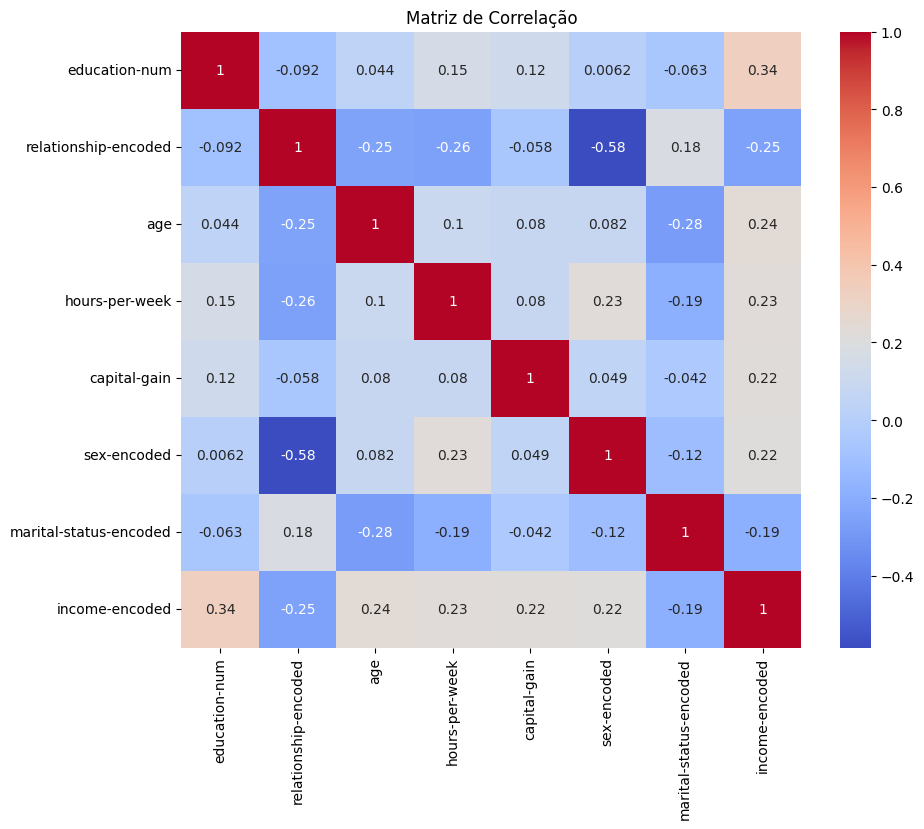

In [23]:
cols = df_train_final.select_dtypes(include=[np.number]).columns

if len(cols) > 1:
    plt.figure(figsize=(10, 8))
    sns.heatmap(df_train_clean[cols].corr(), annot=True, cmap='coolwarm')
    plt.title('Matriz de Correlação')
    plt.show()

# Training the kNN Classifier

## Finding the best 'k'

Vamos usar a técnica de validação cruzada.

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, cross_validate, KFold, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score


=== MELHOR VALOR DE K ===
Melhor K: 25 com acurácia: 0.8388


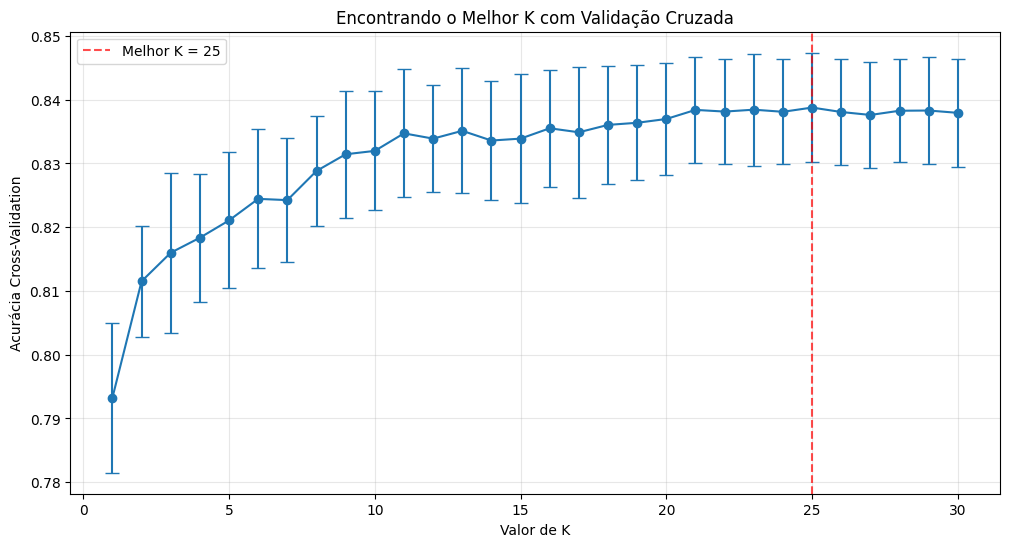

In [25]:
k_range = range(1, 31)
k_scores = []
k_std = []

for k in k_range:
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    
    # Validação cruzada
    scores = cross_val_score(
        knn_temp, X_train_scaled, Y_train, 
        cv=30, scoring='accuracy', n_jobs=-1
    )
    
    k_scores.append(scores.mean())
    k_std.append(scores.std())

# Encontrar o melhor K
best_k = k_range[np.argmax(k_scores)]
best_score = max(k_scores)

print(f"\n=== MELHOR VALOR DE K ===")
print(f"Melhor K: {best_k} com acurácia: {best_score:.4f}")

# Plotar resultados
plt.figure(figsize=(12, 6))
plt.errorbar(k_range, k_scores, yerr=k_std, marker='o', linestyle='-', capsize=5)
plt.axvline(x=best_k, color='red', linestyle='--', alpha=0.7, label=f'Melhor K = {best_k}')
plt.xlabel('Valor de K')
plt.ylabel('Acurácia Cross-Validation')
plt.title('Encontrando o Melhor K com Validação Cruzada')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [26]:
from sklearn.model_selection import StratifiedKFold

stratified_kf = StratifiedKFold(n_splits=30, shuffle=True, random_state=42)

k_scores_stratified = []
for k in k_range:
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_temp, X_train_scaled, Y_train, 
                           cv=stratified_kf, scoring='accuracy', n_jobs=-1)
    k_scores_stratified.append(scores.mean())

best_k_stratified = k_range[np.argmax(k_scores_stratified)]
print(f"Melhor K com StratifiedKFold: {best_k_stratified}")

Melhor K com StratifiedKFold: 29


In [27]:
kNN = KNeighborsClassifier(n_neighbors=best_k)
kNN.fit(X_train_scaled, Y_train)

y_pred = kNN.predict(X_test_scaled)
y_pred_proba = kNN.predict_proba(X_test_scaled)

print("Previsões nas primeiras 10 amostras de teste:")
for i in range(10):
    print(f"Amostra {i+1}: Real={Y_train.iloc[i]}, Predito={y_pred[i]}")

Previsões nas primeiras 10 amostras de teste:
Amostra 1: Real=0, Predito=0
Amostra 2: Real=0, Predito=0
Amostra 3: Real=0, Predito=0
Amostra 4: Real=0, Predito=1
Amostra 5: Real=0, Predito=0
Amostra 6: Real=0, Predito=1
Amostra 7: Real=0, Predito=0
Amostra 8: Real=1, Predito=0
Amostra 9: Real=1, Predito=1
Amostra 10: Real=1, Predito=1


In [28]:
# Métricas de avaliação
accuracy = accuracy_score(Y_test, y_pred)
print(f"Acurácia Final: {accuracy:.3f}")

print("\nRelatório de Classificação Detalhado:")
print(classification_report(Y_test, y_pred))

# 0.839 - k=30 (sem 'race-encoded')
# 0.839 - k=21 (com 'race-encoded')


Acurácia Final: 0.834

Relatório de Classificação Detalhado:
              precision    recall  f1-score   support

           0       0.87      0.92      0.89     11360
           1       0.70      0.57      0.63      3700

    accuracy                           0.83     15060
   macro avg       0.78      0.74      0.76     15060
weighted avg       0.83      0.83      0.83     15060



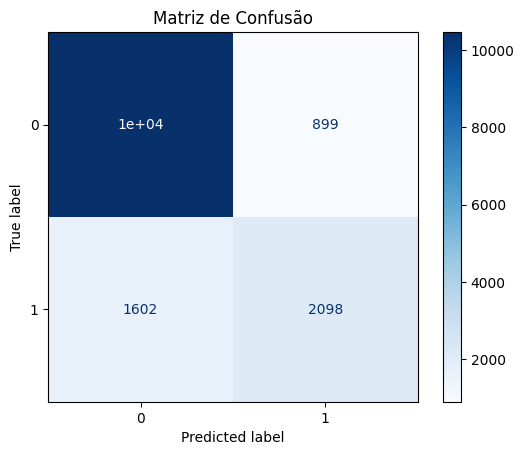

In [29]:
# Matriz de Confusão
cm = confusion_matrix(Y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Matriz de Confusão')
plt.show()

In [32]:
output = pd.DataFrame({"Id": range(0, len(y_pred)), "income": Y_test})
output.to_csv("submission.csv", index=False)

In [31]:
"""
# Importância das features (baseada na distância)
# Quanto maior o valor, mais importante a feature para o KNN
feature_importance = np.mean(kNN.kneighbors(X_test_scaled)[0], axis=0)

plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importance)
plt.xlabel('Importância Relativa')
plt.title('Importância das Features (baseada nas distâncias)')
plt.show()

# Exemplos de vizinhos mais próximos
distances, indices = kNN.kneighbors(X_test_scaled[:5])
print("\nVizinhos mais próximos para as primeiras 5 amostras:")
for i in range(5):
    print(f"Amostra {i+1}: Vizinhos índices {indices[i]}, Distâncias {distances[i]}")
"""

'\n# Importância das features (baseada na distância)\n# Quanto maior o valor, mais importante a feature para o KNN\nfeature_importance = np.mean(kNN.kneighbors(X_test_scaled)[0], axis=0)\n\nplt.figure(figsize=(10, 6))\nplt.barh(X.columns, feature_importance)\nplt.xlabel(\'Importância Relativa\')\nplt.title(\'Importância das Features (baseada nas distâncias)\')\nplt.show()\n\n# Exemplos de vizinhos mais próximos\ndistances, indices = kNN.kneighbors(X_test_scaled[:5])\nprint("\nVizinhos mais próximos para as primeiras 5 amostras:")\nfor i in range(5):\n    print(f"Amostra {i+1}: Vizinhos índices {indices[i]}, Distâncias {distances[i]}")\n'

In [1]:
from export import VisualReport

report = VisualReport()
report.generate_report("ep1.ipynb", "output/ep1.html")

Lendo o notebook: ep1.ipynb
Carregando template...
Usando template padrão: templates/template1.html
Relatório salvo com sucesso em: output/ep1.html
